### Import packages, connect to openEO, and define aoi

In [1]:
#import
import openeo
import folium
import json
import shapely.geometry
import os
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# connect to openeo
conn = openeo.connect("https://openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [3]:
# out dir
outdir = "./auxiliary_data/senales"

# aoi
aoi = json.load(open('auxiliary_data/senales/senales_wgs84.geojson'))

# define time period
time_period = ['2023-02-01', '2023-02-28']

# check the aoi
region = aoi['features'][0]['geometry']
geom = shapely.geometry.shape(region)
centroid = geom.centroid
center_latlon = [centroid.y, centroid.x]

m = folium.Map(location=center_latlon, zoom_start=10)

folium.GeoJson(aoi).add_to(m)
m

### Load data

In [4]:
s2 = conn.load_collection(
    'SENTINEL2_L1C',
    spatial_extent=region,
    temporal_extent=time_period,
    bands=["B02", "B03", "B04", "B08", "B11"])

### NDVI

In [5]:
# NDVI
red = s2.band("B04")
nir = s2.band("B08")
ndvi = (nir - red) / (nir + red)
ndvi = ndvi.mask_polygon(mask=aoi)

In [6]:
# ndvi.download(os.path.join(outdir, 'ndvi.nc'))

<xarray.Dataset> Size: 182MB
Dimensions:  (t: 11, x: 2415, y: 1715)
Coordinates:
  * t        (t) datetime64[ns] 88B 2023-02-02 2023-02-05 ... 2023-02-27
  * x        (x) float64 19kB 6.319e+05 6.319e+05 ... 6.56e+05 6.561e+05
  * y        (y) float64 14kB 5.185e+06 5.185e+06 ... 5.167e+06 5.167e+06
Data variables:
    crs      |S1 1B ...
    var      (t, y, x) float32 182MB ...
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform


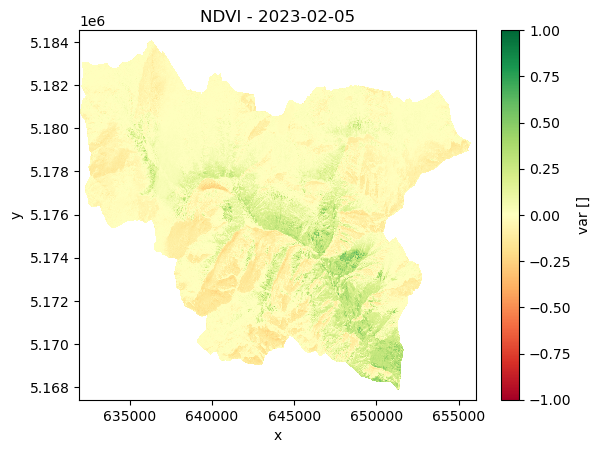

In [9]:
# save png
ndvi_ds = xr.open_dataset('./auxiliary_data/senales/ndvi.nc')

print(ndvi_ds)
ndvi_data = ndvi_ds['var'].isel(t=1)

fig, ax = plt.subplots()
ndvi_data.plot(cmap='RdYlGn', vmin=-1, vmax=1)
plt.title(f"NDVI - {str(ndvi_ds['t'].values[1])[:10]}")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.savefig('./auxiliary_data/senales/ndvi.png', bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()

In [ ]:
# # submit job with a name
# job = ndvi.create_job(
#     title="ndvi")

# job_id = job.job_id
# print(f"Job ID: {job_id}")

# job.start_and_wait()

# # download
# job.download_results(target=os.path.join(outdir))

### NDSI

In [10]:
# NDSI
green = s2.band("B03")
swir = s2.band("B11")
ndsi = (green - swir) / (green + swir)
ndsi = ndsi.mask_polygon(mask=aoi)

In [11]:
# ndsi.download(os.path.join(outdir, 'ndsi.nc'))

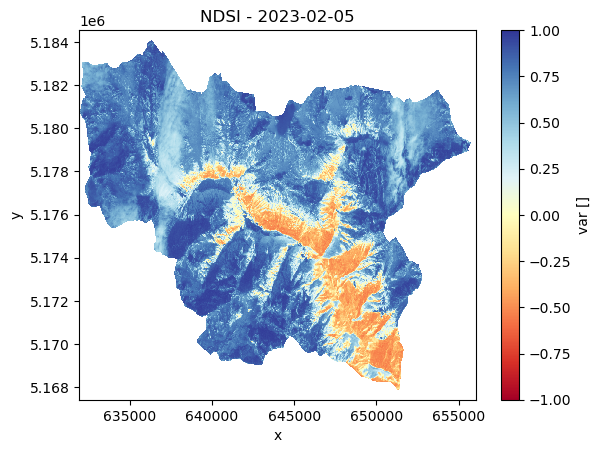

In [12]:
# save png
ndsi_ds = xr.open_dataset('./auxiliary_data/senales/ndsi.nc')

fig, ax = plt.subplots()
ndsi_ds['var'].isel(t=1).plot(cmap='RdYlBu', vmin=-1, vmax=1)
plt.title(f"NDSI - {str(ndsi_ds['t'].values[1])[:10]}")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.savefig('./auxiliary_data/senales/ndsi.png', bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()

In [ ]:
# # submit job with a name
# job = ndsi.create_job(
#     title="ndsi")

# job_id = job.job_id
# print(f"Job ID: {job_id}")

# job.start_and_wait()

# # download
# job.download_results(target=os.path.join(outdir))

### Difference between Blue and NIR

In [13]:
# diff B NIR
blue = s2.band("B02")
diff_B_NIR = (blue - nir) / (blue + nir)
diff_B_NIR = diff_B_NIR.mask_polygon(mask=aoi) 

In [11]:
# diff_B_NIR.download(os.path.join(outdir, 'diff_B_NIR.nc'))

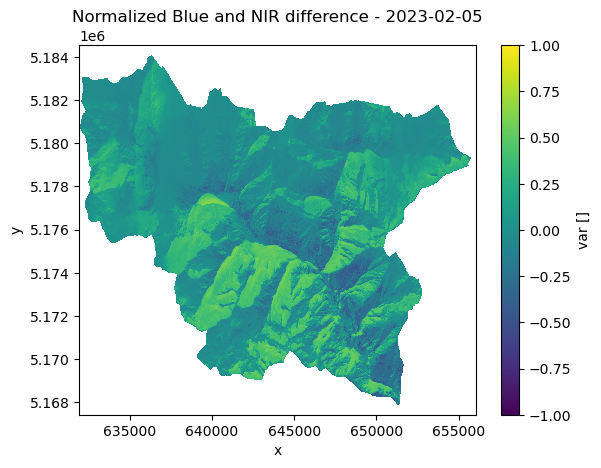

In [14]:
# save png
diff_B_NIR_ds = xr.open_dataset('./auxiliary_data/senales/diff_B_NIR.nc')

fig, ax = plt.subplots()
diff_B_NIR_ds['var'].isel(t=1).plot(cmap='viridis', vmin=-1, vmax=1)
plt.title(f"Normalized Blue and NIR difference - {str(diff_B_NIR_ds['t'].values[1])[:10]}")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.savefig('./auxiliary_data/senales/diff_B_NIR.png', bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()

In [ ]:
# # submit job with a name
# job = diff_B_NIR.create_job(
#     title="diff_B_NIR")

# job_id = job.job_id
# print(f"Job ID: {job_id}")

# job.start_and_wait()

# # download
# job.download_results(target=os.path.join(outdir))

### Shadow Index

In [15]:
# shadow index
shad_idx = ((green - swir) / (green + swir) / green)
shad_idx = shad_idx.mask_polygon(mask=aoi) 

In [13]:
# shad_idx.download(os.path.join(outdir,'shad_idx.nc'))

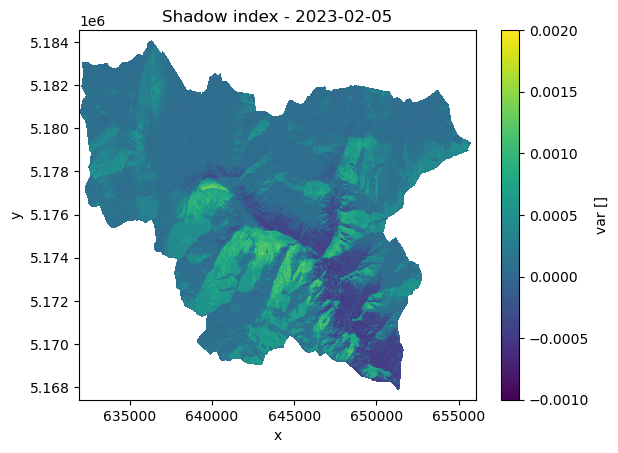

In [16]:
# save png
shad_idx_ds = xr.open_dataset('./auxiliary_data/senales/shad_idx.nc')

fig, ax = plt.subplots()
shad_idx_ds['var'].isel(t=1).plot(cmap='viridis', vmin=-0.001, vmax=0.002)
plt.title(f"Shadow index - {str(shad_idx_ds['t'].values[1])[:10]}")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.savefig('./auxiliary_data/senales/shad_idx.png', bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()

In [7]:
# # submit job with a name
# job = shad_idx.create_job(
#     title="shad_idx")

# job_id = job.job_id
# print(f"Job ID: {job_id}")

# job.start_and_wait()

# # download
# job.download_results(target=os.path.join(outdir))


Job ID: j-25082813185543919daf1744e769510b
0:00:00 Job 'j-25082813185543919daf1744e769510b': send 'start'
0:00:13 Job 'j-25082813185543919daf1744e769510b': queued (progress 0%)
0:00:18 Job 'j-25082813185543919daf1744e769510b': queued (progress 0%)
0:00:25 Job 'j-25082813185543919daf1744e769510b': queued (progress 0%)
0:00:33 Job 'j-25082813185543919daf1744e769510b': queued (progress 0%)
0:00:43 Job 'j-25082813185543919daf1744e769510b': queued (progress 0%)
0:00:55 Job 'j-25082813185543919daf1744e769510b': queued (progress 0%)
0:01:11 Job 'j-25082813185543919daf1744e769510b': queued (progress 0%)
0:01:30 Job 'j-25082813185543919daf1744e769510b': running (progress N/A)
0:01:54 Job 'j-25082813185543919daf1744e769510b': running (progress N/A)
0:02:24 Job 'j-25082813185543919daf1744e769510b': running (progress N/A)
0:03:03 Job 'j-25082813185543919daf1744e769510b': finished (progress 100%)


/tmp/ipykernel_17498/3206328903.py:11: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results(target=os.path.join(outdir))
/home/jengblom/miniconda3/envs/snowmap/lib/python3.9/site-packages/openeo/rest/job.py:192: UserDeprecationWarning: Call to deprecated method get_result. (Use `BatchJob.get_results` instead.) -- Deprecated since version 0.4.10.
  return self.get_result().download_files(target)
/home/jengblom/miniconda3/envs/snowmap/lib/python3.9/site-packages/openeo/rest/job.py:196: UserDeprecationWarning: Call to deprecated class _Result. (Use `JobResults` instead) -- Deprecated since version 0.4.10.
  return _Result(self)


{PosixPath('auxiliary_data/senales/openEO_2023-02-02Z.tif'): {'href': 'https://s3.waw3-1.openeo.v1.dataspace.copernicus.eu/openeo-data-prod-waw4-1/batch_jobs/j-25082813185543919daf1744e769510b/openEO_2023-02-02Z.tif?X-Proxy-Head-As-Get=true&X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=d9630ef55df84f1396b9769f5893eebd%2F20250828%2Fwaw4-1%2Fs3%2Faws4_request&X-Amz-Date=20250828T132200Z&X-Amz-Expires=86400&X-Amz-SignedHeaders=host&X-Amz-Security-Token=eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJyb2xlX2FybiI6ImFybjpvcGVuZW93czppYW06Ojpyb2xlL29wZW5lby1kYXRhLXByb2Qtd2F3NC0xLXdvcmtzcGFjZSIsImluaXRpYWxfaXNzdWVyIjoib3BlbmVvLnByb2Qud2F3My0xLm9wZW5lby1pbnQudjEuZGF0YXNwYWNlLmNvcGVybmljdXMuZXUiLCJodHRwczovL2F3cy5hbWF6b24uY29tL3RhZ3MiOnsicHJpbmNpcGFsX3RhZ3MiOnsiam9iX2lkIjpbImotMjUwODI4MTMxODU1NDM5MTlkYWYxNzQ0ZTc2OTUxMGIiXSwidXNlcl9pZCI6WyJkNzZhNDk2Yi02YjIzLTRkZjEtYjE3My04N2Y0ZjI0ZDFjMTEiXX0sInRyYW5zaXRpdmVfdGFnX2tleXMiOlsidXNlcl9pZCIsImpvYl9pZCJdfSwiaXNzIjoic3RzLndhdzMtMS5vcGVuZW8udjEuZGF0YXNwYWNlL